**Name : Abeer Fatima**

**Domain : AI/ML**

**DHC-3603**

# **Customer Segmentation Using Clustering**
**Objective:**

Customer segmentation is a crucial task in marketing and business analytics, allowing
companies to identify different groups of customers based on their behaviors and
characteristics. This project applies clustering techniques to segment customers effectively,
helping businesses tailor their strategies to different customer groups.

# **Data Load**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

# **Data Cleaning**

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows_df.shape[0])

Number of duplicate rows: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


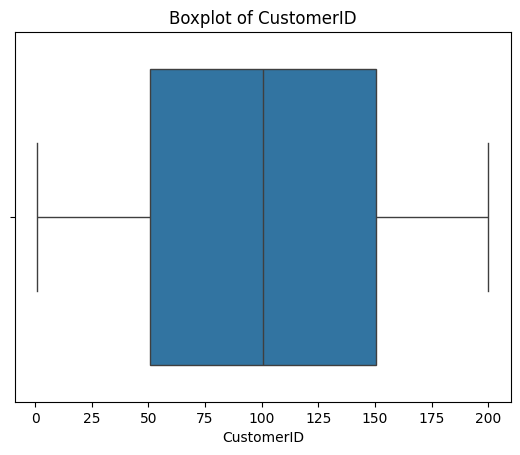

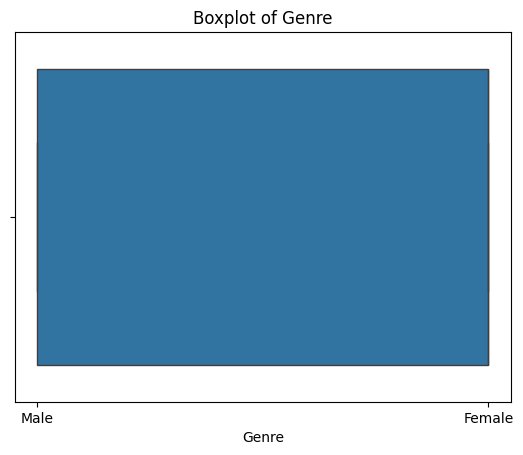

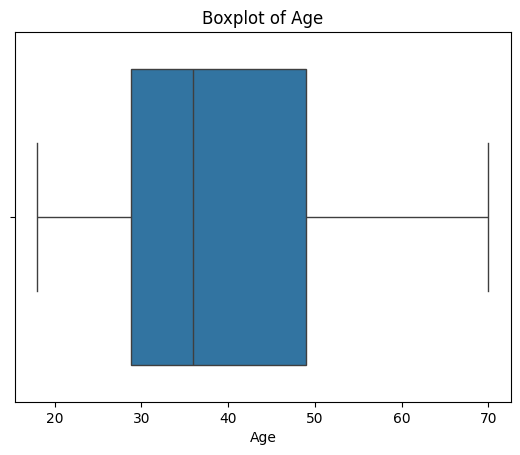

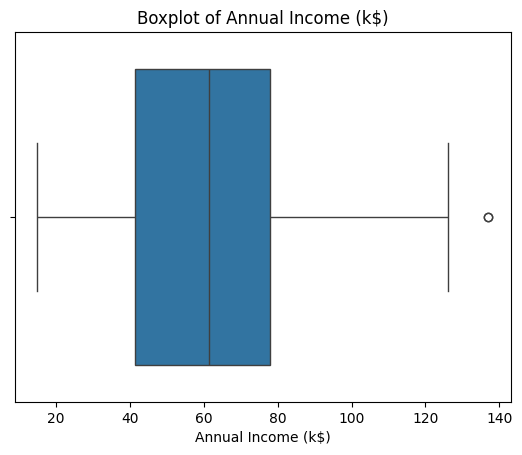

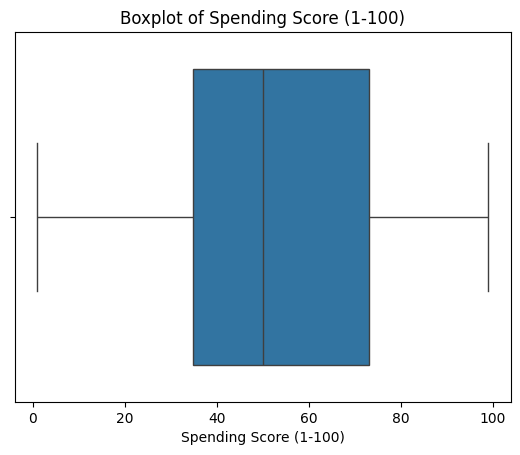

In [ ]:
import matplotlib.pyplot as plt
for column in df.columns:
  plt.figure()
  sns.boxplot(x=df[column])
  plt.title(f"Boxplot of {column}")
  plt.show()

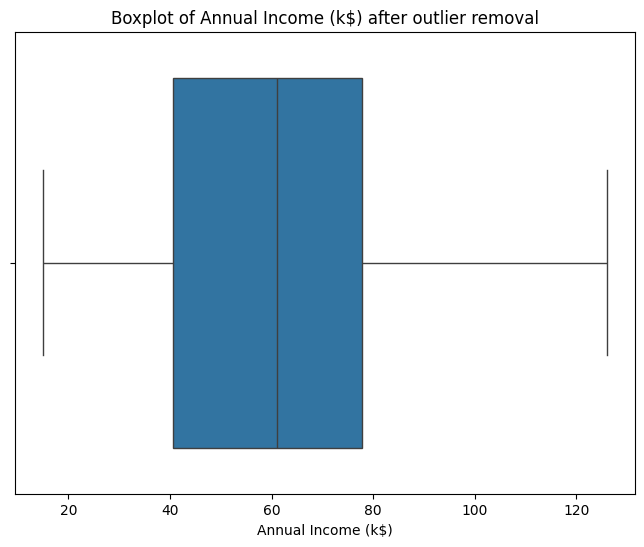

In [ ]:
import matplotlib.pyplot as plt
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['Annual Income (k$)'] >= lower_bound) & (df['Annual Income (k$)'] <= upper_bound)]

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtered['Annual Income (k$)'])
plt.title('Boxplot of Annual Income (k$) after outlier removal')
plt.show()


In [ ]:
import pandas as pd
import re
def check_special_characters(df):
    for col in df.columns:
        for value in df[col]:
            if isinstance(value, str):  # Check if the value is a string
                if re.search(r'[^\w\s]', value): # Check for special characters
                    print("Dataset contains special characters.")
                    return
    print("Dataset does not contain special characters.")

check_special_characters(df)


Dataset does not contain special characters.


In [ ]:
df.drop('CustomerID', axis=1, inplace=True)

In [ ]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# **Exploratory Data Analysis**

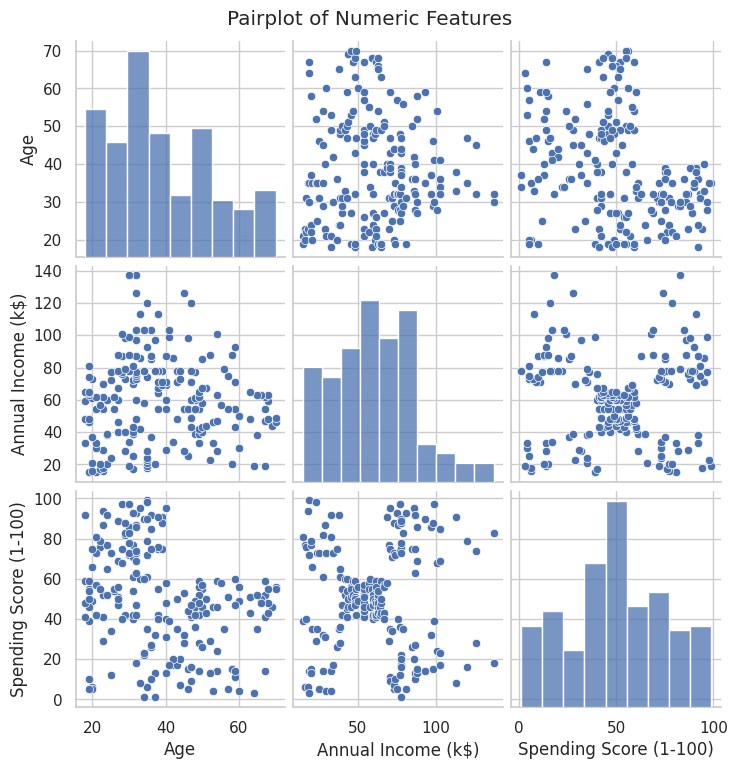

In [ ]:
import matplotlib.pyplot as plt
# Pairplot to visualize relationships between all numeric features
sns.pairplot(numeric_df)
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

# **Univariate Analysis**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style='whitegrid')

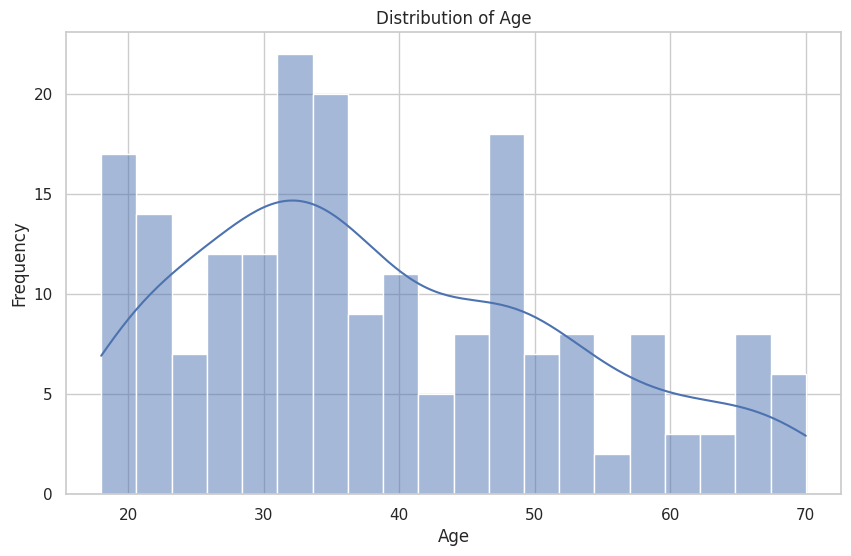

In [ ]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

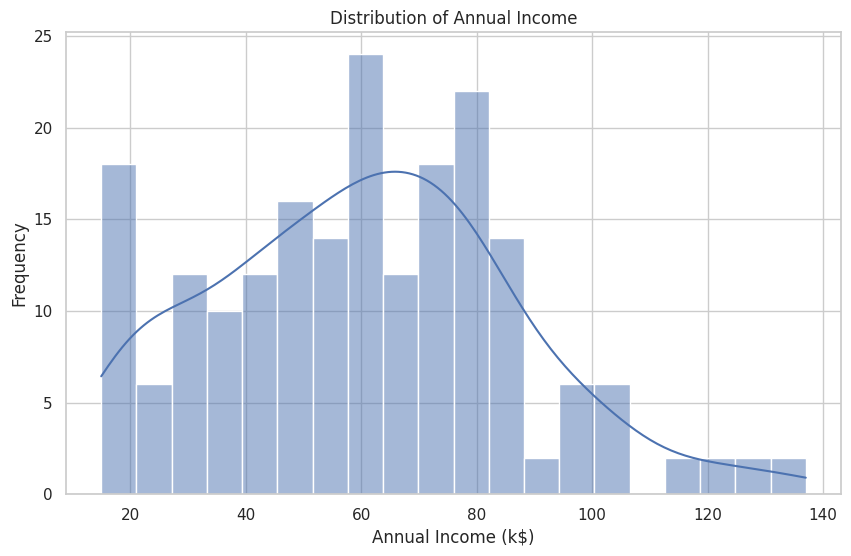

In [ ]:
# Distribution of Annual Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

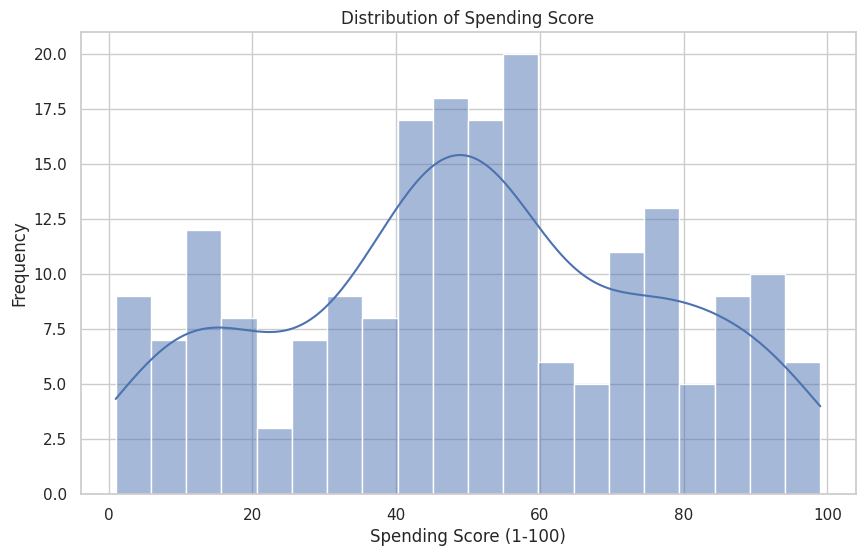

In [ ]:
# Distribution of Spending Score
plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

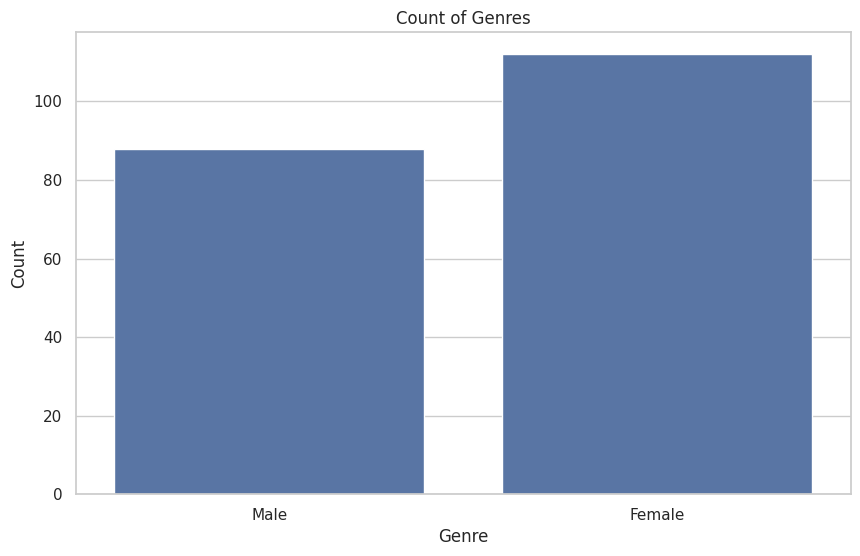

In [ ]:
# Genre Count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Genre')  # Use 'data=df' instead of 'df=data'
plt.title('Count of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

# **Bivariate Analysis**

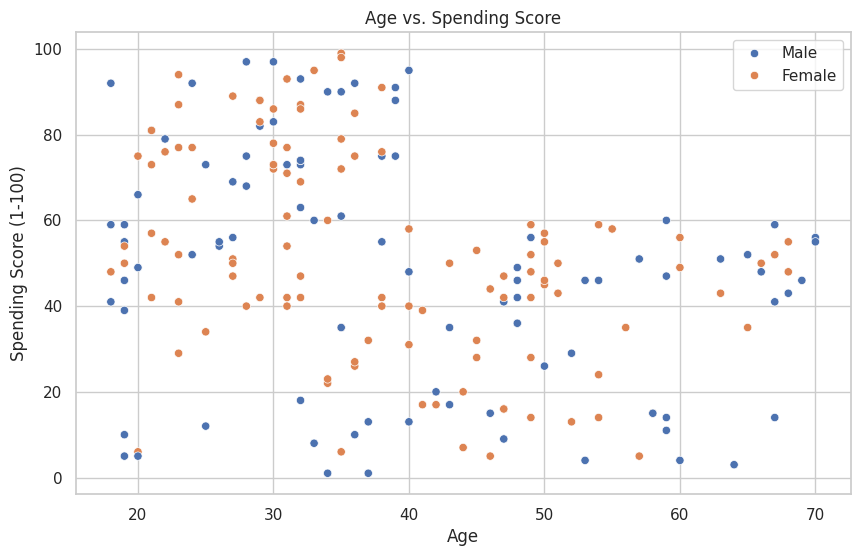

In [ ]:
# Age vs. Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Genre')
plt.title('Age vs. Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

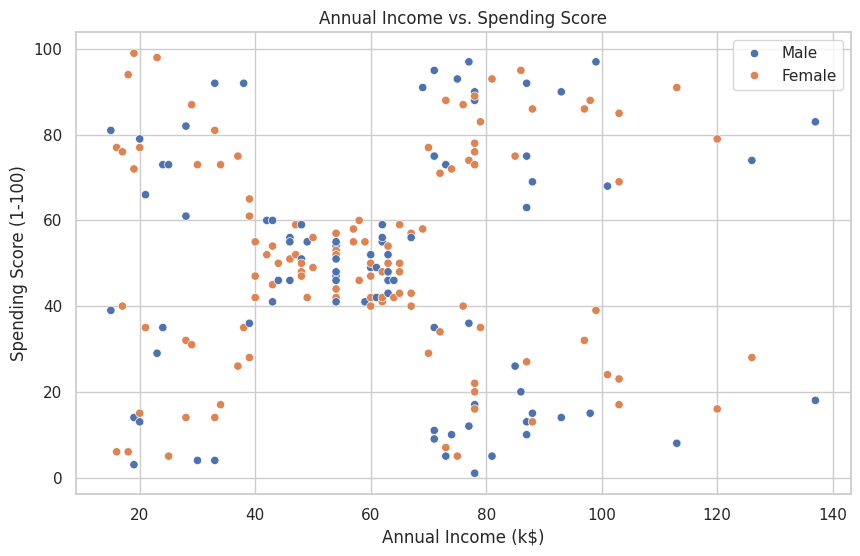

In [ ]:
# Annual Income vs. Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre')
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

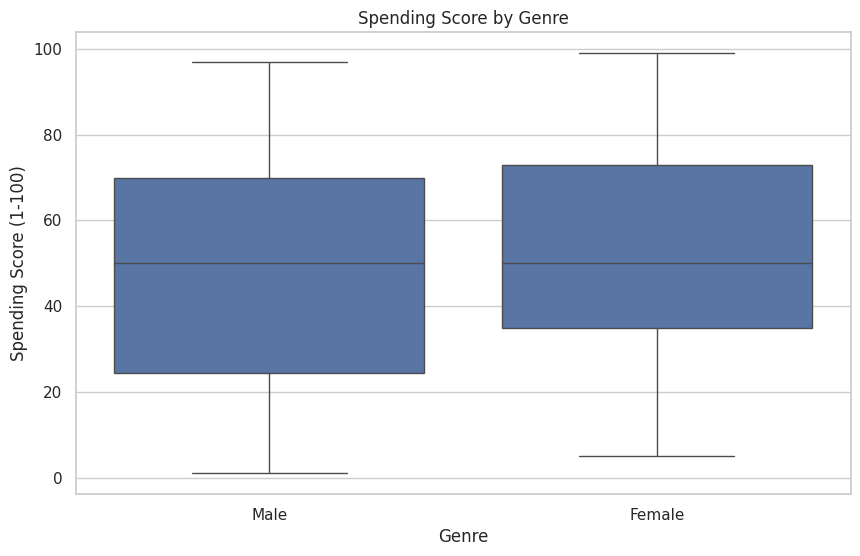

In [ ]:
# Boxplot of Spending Score by Genre
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Genre', y='Spending Score (1-100)')
plt.title('Spending Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Spending Score (1-100)')
plt.show()

# **Income vs. Spending Score Analysis**

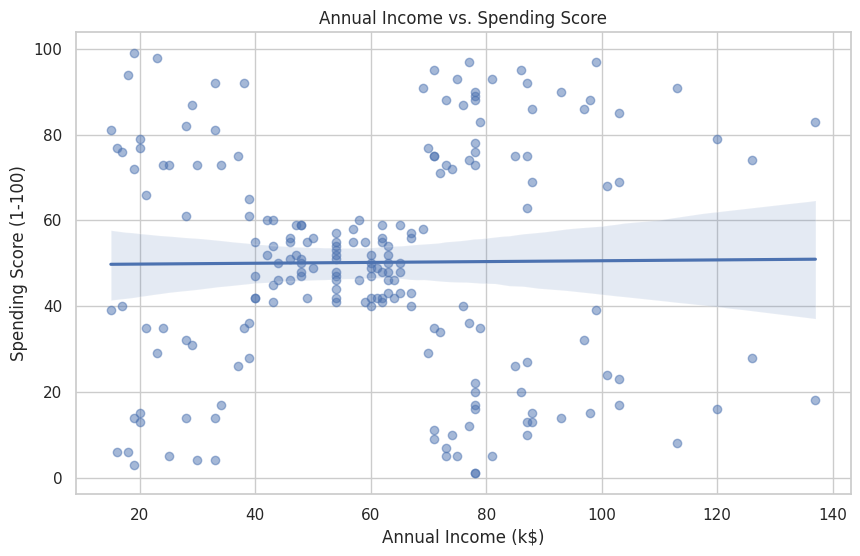

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', scatter_kws={'alpha':0.5})
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# **Genre Analysis with Spending Score**

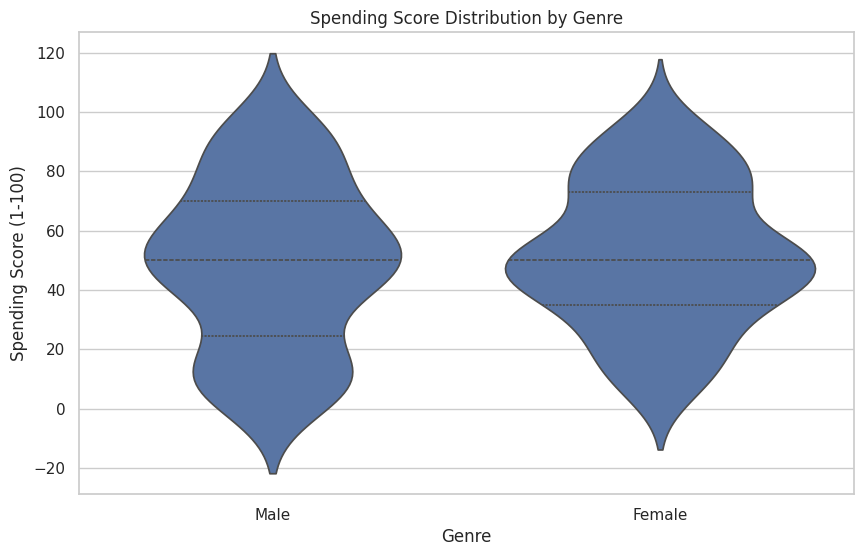

In [ ]:
# Violin plot for Spending Score by Genre
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Genre', y='Spending Score (1-100)', inner='quartile')
plt.title('Spending Score Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Spending Score (1-100)')
plt.show()

# **Spending Score Distribution**

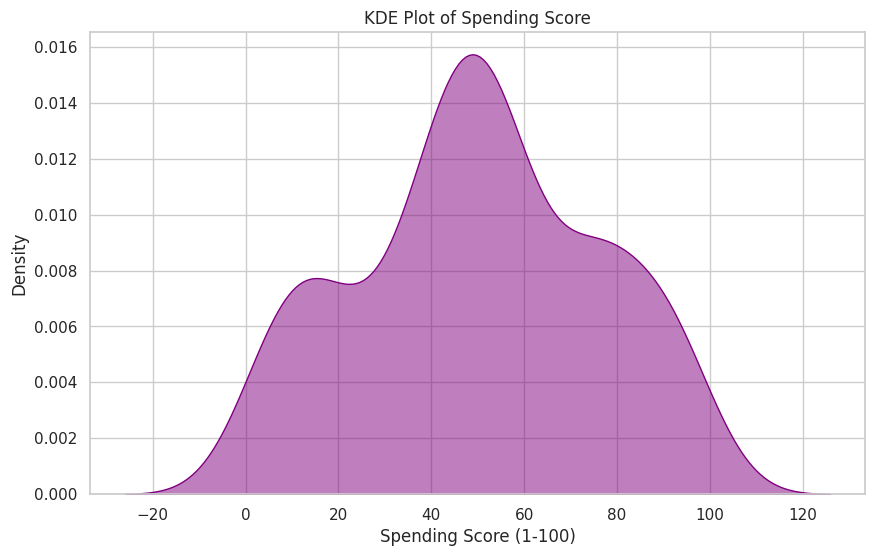

In [ ]:
# KDE plot for Spending Score
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['Spending Score (1-100)'], fill=True, color='purple', alpha=0.5)
plt.title('KDE Plot of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Density')
plt.show()

# **Correlation Matrix**

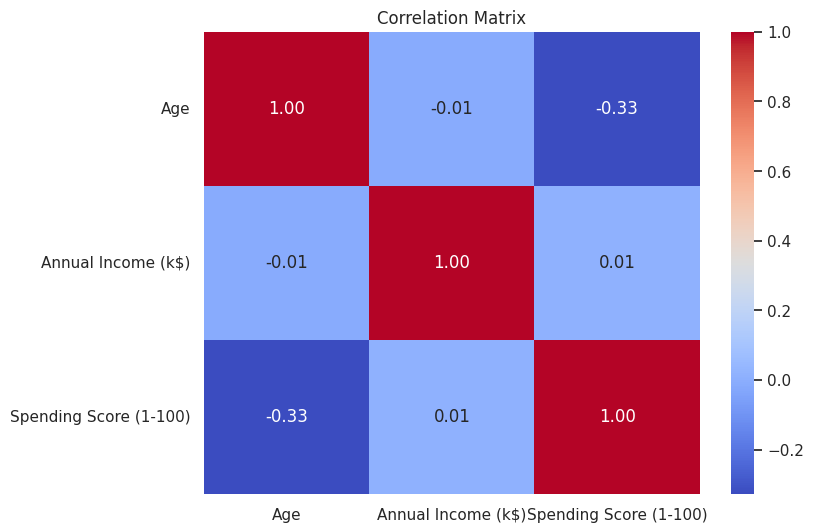

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# **Clustering (KMean)**

In [ ]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Age Group,Income Segment
0,Male,19,15,39,19-25,Low
1,Male,21,15,81,19-25,Low
2,Female,20,16,6,19-25,Low
3,Female,23,16,77,19-25,Low
4,Female,31,17,40,26-35,Low


# **cluster on 2 features**

In [ ]:
#cluster on 2 features
df1=df[["Annual Income (k$)","Spending Score (1-100)"]]

In [ ]:
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# **Scatter Plot**

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

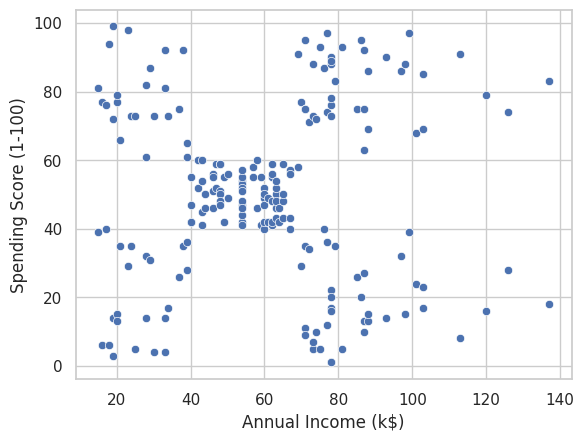

In [ ]:
#Scatter plot
sns.scatterplot(data=df1,x="Annual Income (k$)",y="Spending Score (1-100)")

In [ ]:
from sklearn.cluster import KMeans #Import KMeans from scikit-learn
errors=[] #Initialize an empty list errors to store the inertia values
for i in range (1,11): #Loop through different values of k (from 1 to 10). This runs K-Means with different cluster numbers (i from 1 to 10).
  kmeans=KMeans(n_clusters=i) #Train K-Means on df1 and store the inertia (error). kmeans.inertia_ gives the sum of squared distances of samples to their nearest cluster center.
  kmeans.fit(df1)
  errors.append(kmeans.inertia_)

# **Elbow Method**

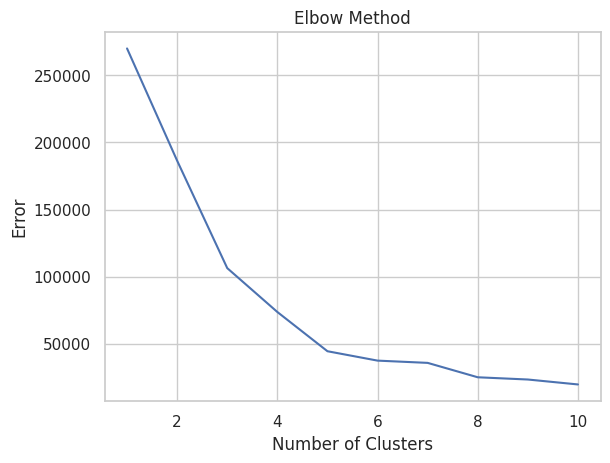

In [ ]:
#plot the results for elbow method
plt.plot(range(1,11),errors)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Error")
plt.show()

In [ ]:
km = KMeans(n_clusters=5) # Initialize K-Means with 5 clusters
km.fit(df1) # Train the model on df1
y=km.predict(df1) # Predict cluster labels for each row in df1
df1["Label"] = y # Store the assigned labels in a new column
df1.head() # Display the first few rows

<ipython-input-59-865cb715fd25>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Label"] = y


,Annual Income (k$),Spending Score (1-100),Label
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3


# **Scatter Plot**

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

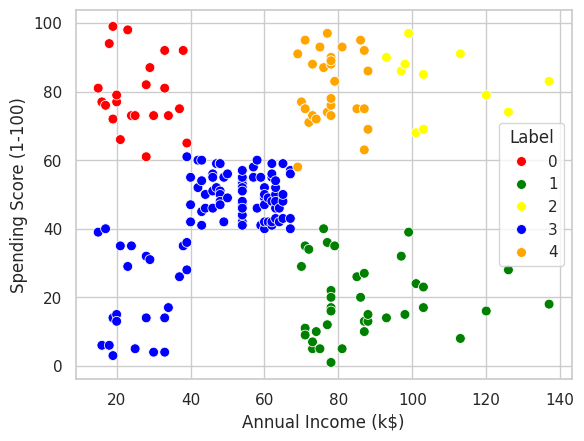

In [ ]:
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",hue="Label",data=df1, s=50 , palette=["red","green","yellow","blue","orange"])

# **cluster on 3 features**

In [ ]:
#cluster on 3 features
df2=df[["Annual Income (k$)","Spending Score (1-100)","Age"]]
df2.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


In [ ]:
from sklearn.cluster import KMeans
errors=[]
for i in range (1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(df2)
  errors.append(kmeans.inertia_)

# **Elbow Method**

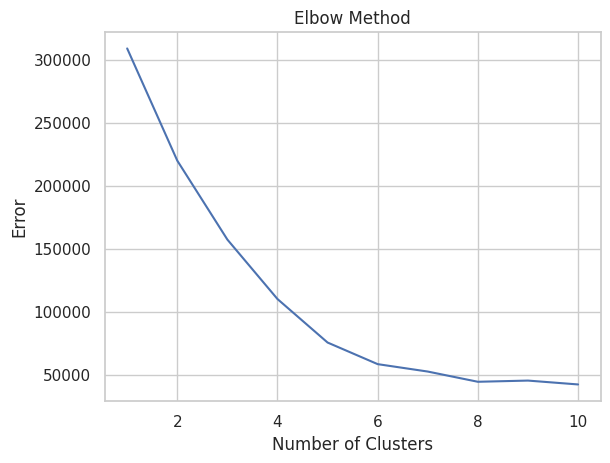

In [ ]:
#plot the results for elbow method
plt.plot(range(1,11),errors)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Error")
plt.show()

In [ ]:
#Initializes a K-Means clustering model with 5 clusters.
km = KMeans(n_clusters=5)
#Trains (fits) the model on the dataset df2, finding cluster centers.
km.fit(df2)
#Assigns each data point in df2 to one of the 5 clusters.
y=km.predict(df2)
#Adds a new column "Label" to df2, where each row is assigned a cluster label (0 to 4).
df2["Label"] = y
#Displays the first few rows of df2, now with the added "Label" column.
df2.head()

<ipython-input-68-3d38936584ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Label"] = y


,Annual Income (k$),Spending Score (1-100),Age,Label
0,15,39,19,3
1,15,81,21,2
2,16,6,20,3
3,16,77,23,2
4,17,40,31,3


# **Visualize customer segments**

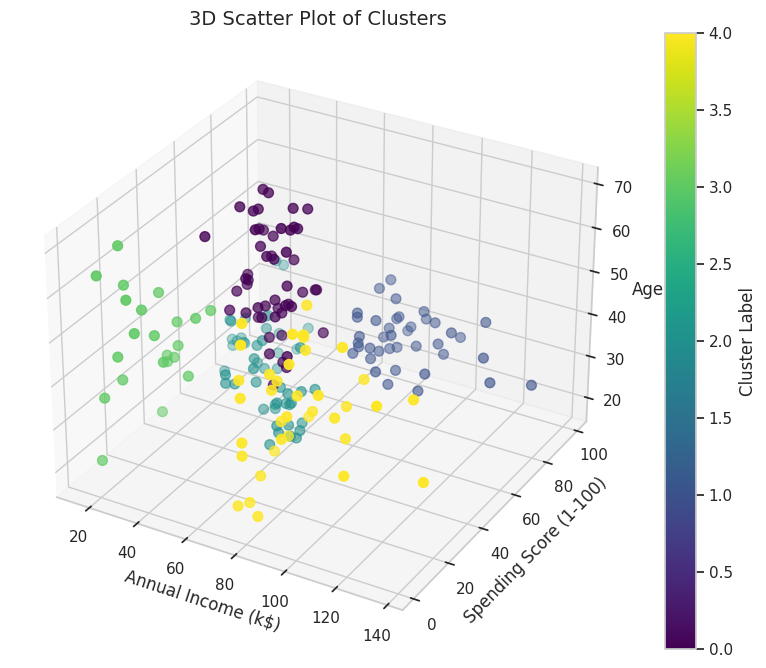

In [ ]:
#Visualize customer segments

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use a colormap with distinct colors
scatter = ax.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], df2['Age'],
                     c=df2['Label'], s=50, cmap='viridis')
# Customize the plot for better readability
ax.set_xlabel('Annual Income (k$)', fontsize=12)
ax.set_ylabel('Spending Score (1-100)', fontsize=12)
ax.set_zlabel('Age', fontsize=12)
ax.set_title('3D Scatter Plot of Clusters', fontsize=14)

# Add a colorbar to show the mapping of colors to labels
fig.colorbar(scatter, label='Cluster Label')


plt.show()


# **Interpret customer segments behavior**

This code performs exploratory data analysis (EDA) and clustering on a customer dataset. Let's break down the code section by section:

**1. Data Loading and Initial Exploration:**

- Loads the dataset (`Mall_Customers.csv`) into a pandas DataFrame.
- Displays the first few rows (`df.head()`) and the shape of the DataFrame (`df.shape`) to get an overview.
- Checks for missing values (`df.isnull().sum()`) and duplicate rows.
- Prints information about the DataFrame's columns and data types using `df.info()`.
- Generates boxplots for each column to visually identify outliers.

**2. Outlier Handling:**

- Identifies and removes outliers in the 'Annual Income (k$)' column using the IQR method.
- Displays the boxplot of 'Annual Income (k$)' after outlier removal.
- Checks for special characters in all the string values

**3. Data Preprocessing:**

- Drops the 'CustomerID' column as it's likely an identifier and not relevant for analysis.

**4. Exploratory Data Analysis (EDA):**

- **Pairplot:** Visualizes the pairwise relationships between all numeric features to identify correlations.
- **Univariate Analysis:** Creates histograms and countplots for 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', and 'Genre' to understand their distributions.
- **Bivariate Analysis:** Generates scatter plots and boxplots to explore relationships between different pairs of features (e.g., 'Age' vs. 'Spending Score', 'Annual Income' vs. 'Spending Score').  It also includes a regression plot for annual income vs spending score, and a violin plot of spending score by genre. Finally, a Kernel Density Estimate plot visualizes the distribution of spending score.
- **Correlation Matrix:** Computes and visualizes the correlation matrix of numeric features using a heatmap.

**5. Clustering:**

- **K-Means Clustering (2 Features):**
    - Selects 'Annual Income (k$)' and 'Spending Score (1-100)' for clustering.
    - Uses the elbow method to determine the optimal number of clusters (from the errors list).
    - Applies K-Means clustering with 5 clusters and adds a 'Label' column to the DataFrame, indicating the cluster assignment of each data point.
    - Visualizes the clusters in a 2D scatter plot.
- **K-Means Clustering (3 Features):**
    - Extends clustering to three features including "Age".
    - Again, it applies the elbow method and K-Means with 5 clusters, then visualizes the data in a 3D scatter plot, enhancing the cluster visualization.  It includes improvements to the 3D plots for improved clarity with better labels and a color bar to clarify the cluster assignment.

**Overall Interpretation**

The code systematically explores the customer dataset to reveal relationships between various features and identify customer segments.

- The EDA provides insights into the individual characteristics of different features and how they interact with each other.  In particular the relationship between annual income and spending score looks to be non-linear.
- The clustering step groups customers into segments based on their annual income, spending score, and age.  The visualization plots allow the analyst to understand how these customers are grouped together.


